In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

In [2]:
df = pd.read_csv('marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv.tsv',sep='\t')
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [3]:
df.head(3)

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af


In [4]:
df.shape

(5000, 32)

In [8]:
df.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [9]:
print(df.columns)

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')


In [10]:
train_data = df[['Uniq Id','Product Id','Product Rating','Product Reviews Count','Product Category','Product Brand','Product Name','Product Image Url','Product Description','Product Tags']]
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [11]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                5000 non-null   object 
 1   Product Id             5000 non-null   object 
 2   Product Rating         2194 non-null   float64
 3   Product Reviews Count  3346 non-null   float64
 4   Product Category       4990 non-null   object 
 5   Product Brand          4987 non-null   object 
 6   Product Name           5000 non-null   object 
 7   Product Image Url      5000 non-null   object 
 8   Product Description    3873 non-null   object 
 9   Product Tags           5000 non-null   object 
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [13]:
# to fill in the place of the null values we use the fillna() method.
train_data['Product Rating'].fillna(0,inplace = True)
train_data['Product Reviews Count'].fillna(0,inplace = True)
train_data['Product Category'].fillna(0,inplace = True)
train_data['Product Brand'].fillna(0,inplace = True)
train_data['Product Description'].fillna(0,inplace = True)

/tmp/ipykernel_103332/185100177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Product Rating'].fillna(0,inplace = True)
/tmp/ipykernel_103332/185100177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Product Reviews Count'].fillna(0,inplace = True)
/tmp/ipykernel_103332/185100177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Product Category'].fillna(0,inplace = True)
/tmp/ipykernel_1

In [14]:
train_data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [15]:
train_data.duplicated().sum()

0

In [16]:
# make column names shorter by using of column_name_mapping.
column_name_mapping = {
    'Uniq Id' : 'ID',
    'Product Id' : 'ProdID',
    'Product Rating' : 'Rating',
    'Product Reviews Count' : 'ReviewCount',
    'Product Category' : 'Category',
    'Product Brand' : 'Brand',
    'Product Name' : 'Name',
    'Product Image Url' : 'ImageURL',
    'Product Description' : 'Description',
    'Product Tags' : 'Tags',
}
# rename the columns
train_data.rename(columns = column_name_mapping, inplace = True)

/tmp/ipykernel_103332/2624240853.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns = column_name_mapping, inplace = True)


In [17]:
train_data.columns

Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Brand', 'Name',
       'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [18]:
train_data

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2771f0606e9638de508741f52029d51c,ad208aa8da338e84dfcf13efd49e8a75,4.5,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0f218eb3ac736975ccfdde987baa4b83,1be8241fd6249f7ee007b06afd7ff45d,3.9,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,34d1aa70845416c3df059a088aaf18dc,96ed378fb9466b11abde8f9baea58844,0.0,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,ff9cfa22550bf036e2487a9100d927f1,f7b05869f3ee7fe22864ea58cbb006d1,0.0,0.0,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,0,Creed Love In Black Hair And Body Wash 6.8oz/2...


In [19]:
train_data.to_csv('clean_data.csv')

In [20]:
# here we convert the id and prodid in float from object
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)

/tmp/ipykernel_103332/3935477019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)


In [21]:
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

/tmp/ipykernel_103332/3524558665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)


In [22]:
train_data.head(3)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [23]:
# now we want the uniquue users,product and ratings.
users = train_data['ID'].nunique()
items = train_data['ProdID'].nunique()
ratings = train_data['Rating'].nunique()
print(f"Number of unique users : {users}")
print(f"Number of unique items : {items}")
print(f"Number of unique ratings : {ratings}")

Number of unique users : 1721
Number of unique items : 1697
Number of unique ratings : 36


ProdID
3.0    214
9.0    204
1.0    200
5.0    199
0.0    196
Name: count, dtype: int64


Text(0.5, 1.0, 'most popular items')

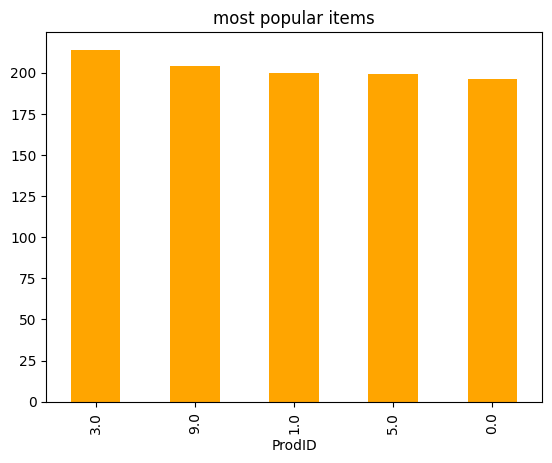

In [24]:
# the most popular items that the should use the most
popular_items = train_data['ProdID'].value_counts().head(5)
print(popular_items)
popular_items.plot(kind = 'bar',color = 'orange')
plt.title('most popular items')

<Axes: xlabel='Rating'>

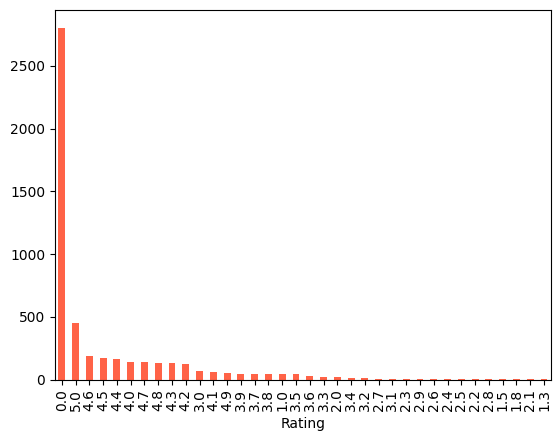

In [25]:
# lets see the most rated counts
train_data['Rating'].value_counts().plot(kind = 'bar',color = 'tomato')

In [26]:
# rating based recommendation system

# reset_index() is used for arrange these columnn in a dataframe
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [27]:
top_rated_items = average_ratings.sort_values(by = 'Rating',ascending = False)
rating_based_recommendation = top_rated_items.head(10)

In [28]:
# we have to convert the reviewcount and rating columns into int type
rating_based_recommendation['ReviewCount'] = rating_based_recommendation['ReviewCount'].astype(int)
rating_based_recommendation['Rating'] = rating_based_recommendation['Rating'].astype(int)

/tmp/ipykernel_103332/846230315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recommendation['ReviewCount'] = rating_based_recommendation['ReviewCount'].astype(int)
/tmp/ipykernel_103332/846230315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recommendation['Rating'] = rating_based_recommendation['Rating'].astype(int)


In [29]:
print("Rating based Recommendation system :top rated products")
rating_based_recommendation

Rating based Recommendation system :top rated products


,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,Moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,Alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,Gold Bond,https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,Versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,Goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1,Red Devil,https://i5.walmartimages.com/asr/60bfe5ba-774c...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,Air Wick,https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4,Bain de Terre,https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12,Long Aid,https://i5.walmartimages.com/asr/f7f29199-bfa5...,5
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1,Diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5


In [30]:
rating_based_recommendation.to_csv('trending_products.csv')

In [31]:
# Content based recommendation system.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# create a TF-IDF vectorizer for item descriptions
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')

# apply TF-IDF vectorization to item description
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

In [32]:
# calculate cosine similarity between items based on description
cosine_similarity_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)
cosine_similarity_content

array([[1.        , 0.01317493, 0.01182614, ..., 0.10132348, 0.01249521,
        0.04414909],
       [0.01317493, 1.        , 0.40297257, ..., 0.00605861, 0.01205174,
        0.04258219],
       [0.01182614, 0.40297257, 1.        , ..., 0.03722526, 0.01081794,
        0.03822285],
       ...,
       [0.10132348, 0.00605861, 0.03722526, ..., 1.        , 0.00574604,
        0.02030237],
       [0.01249521, 0.01205174, 0.01081794, ..., 0.00574604, 1.        ,
        0.04038529],
       [0.04414909, 0.04258219, 0.03822285, ..., 0.02030237, 0.04038529,
        1.        ]])

In [33]:
# lets search a item name from the data
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

# find the index of the item
item_index = train_data[train_data['Name']==item_name].index[0]

In [34]:
# get the cosine similarity scores for the items
similar_items = list(enumerate(cosine_similarity_content[item_index]))

In [35]:
similar_items

[(0, 1.0),
 (1, 0.013174926471429043),
 (2, 0.011826144669172494),
 (3, 0.014725800982130423),
 (4, 0.007938862609752486),
 (5, 0.010646596444798736),
 (6, 0.012108216681164142),
 (7, 0.13040605480446257),
 (8, 0.01589754381178025),
 (9, 0.012059549747699877),
 (10, 0.013911994487814276),
 (11, 0.20746321999578637),
 (12, 0.010064334788864782),
 (13, 0.014380195255258655),
 (14, 0.01001156842649289),
 (15, 0.011096593707703313),
 (16, 0.015021998998432881),
 (17, 0.009919358521698939),
 (18, 0.08462292192240438),
 (19, 0.01568282492782382),
 (20, 0.011015749566199984),
 (21, 0.011912155382061217),
 (22, 0.01316210304702617),
 (23, 0.013005451156104566),
 (24, 0.014655891046218283),
 (25, 0.011061150702121917),
 (26, 0.015228133667057867),
 (27, 0.007020508142120105),
 (28, 0.010547482215258617),
 (29, 0.013845294463354732),
 (30, 0.014493397252503358),
 (31, 0.013221516139968702),
 (32, 0.020257934269408667),
 (33, 0.010970487852921958),
 (34, 0.01271818551738568),
 (35, 0.014009479932

In [36]:
# sort similar items by similarity scores in descending order
similar_items = sorted(similar_items,key = lambda x:x[1],reverse = True)

In [37]:
# these are the top similar items of the searching item in vector format
top_similar_items = similar_items[1:10]

In [38]:
# get the indices of the top similar items
recommended_items_indices = [x[0] for x in top_similar_items]

In [43]:
#  get the details of the top similar items
train_data.iloc[recommended_items_indices][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
4854,"OPI Infinite Shine Nail Polish, Dulce De Leche...",1.0,OPI
3052,"OPI Nail Lacquer Nail Polish, Hawaiian Orchid",1.0,OPI
4010,"OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz",2.0,OPI
4752,"OPI Infinite Shine Nail Polish, Let Love Spark...",3.0,OPI
4356,"OPI Nail Lacquer Nail Polish, Go with the Lava...",1.0,OPI
3967,"OPI Infinite Shine Nail Polish, Mini Scotland ...",1.0,OPI
2952,"OPI Nail Lacquer Nail Polish, Miami Beet",0.0,OPI
4966,OPI Nail GelColor + Infinite Shine Polish -TAU...,0.0,OPI
3252,"OPI Nail Lacquer Nail Polish, Shorts Story",1.0,OPI


In [53]:
train_data['Name'][19]

'Crest Complete Whitening + Scope Toothpaste, 5 Ct, 5.8 Oz'

In [40]:
# now we create a function to recommend products for content base

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data,item_name,top_n = 10):
    # check if the item name is exists or not
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data")
        return pd.DataFrame()
    tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
    cosine_similarity_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)
    item_index = train_data[train_data['Name']==item_name].index[0]
    similar_items = list(enumerate(cosine_similarity_content[item_index]))
    similar_items = sorted(similar_items,key = lambda x:x[1],reverse = True)
    top_similar_items = similar_items[1:top_n+1]
    recommended_items_indices = [x[0] for x in top_similar_items]
    recommended_items_details = train_data.iloc[recommended_items_indices][['Name','ReviewCount','Brand','ImageURL','Rating']]
    return recommended_items_details
    
   

In [42]:
# lets try content based recommendations for a specific item
# example 1
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data,item_name,top_n=8)
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
4854,"OPI Infinite Shine Nail Polish, Dulce De Leche...",1.0,OPI,https://i5.walmartimages.com/asr/466527fe-9e5e...,5.0
3052,"OPI Nail Lacquer Nail Polish, Hawaiian Orchid",1.0,OPI,https://i5.walmartimages.com/asr/cef5a3ca-dfed...,4.0
4010,"OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz",2.0,OPI,https://i5.walmartimages.com/asr/bb0c5e20-0ead...,3.0
4752,"OPI Infinite Shine Nail Polish, Let Love Spark...",3.0,OPI,https://i5.walmartimages.com/asr/7eef48ac-3a28...,4.0
4356,"OPI Nail Lacquer Nail Polish, Go with the Lava...",1.0,OPI,https://i5.walmartimages.com/asr/6cd23e3d-f3be...,5.0
3967,"OPI Infinite Shine Nail Polish, Mini Scotland ...",1.0,OPI,https://i5.walmartimages.com/asr/b673df9d-cc73...,0.0
2952,"OPI Nail Lacquer Nail Polish, Miami Beet",0.0,OPI,https://i5.walmartimages.com/asr/083f9170-da65...,0.0
4966,OPI Nail GelColor + Infinite Shine Polish -TAU...,0.0,OPI,https://i5.walmartimages.com/asr/a364a6d7-0cd1...,0.0


In [38]:
# example 2
item_name = 'Colgate My First Baby and Toddler Toothpaste, Fluoride Free and SLS Free, 1.75 Oz'
content_based_rec = content_based_recommendations(train_data,item_name,top_n=8)
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
3376,"Hello Kids Fluoride Free and SLS Free Rinse, N...",19.0,Hello,https://i5.walmartimages.com/asr/6998ff2c-58be...,5.0
3980,Toms of Maine 683377 Toddler Fluoride-Free Nat...,36.0,Tom's of Maine,https://i5.walmartimages.com/asr/3b8f1249-f6bf...,4.4
1754,"Colgate My First Baby and Toddler Toothbrush, ...",19.0,Colgate,https://i5.walmartimages.com/asr/8232c3ab-9c97...,4.1
3159,Colgate Cavity Protection Toothpaste with Fluo...,123.0,Colgate,https://i5.walmartimages.com/asr/acd3637b-d4fc...,0.0
3748,Dr. Brite Whitening Charcoal Fluoride-Free Nat...,1.0,Dr. Brite,https://i5.walmartimages.com/asr/ca6e7ce4-0896...,0.0
1449,Colgate Kids Toothpaste with Anticavity Fluori...,37.0,Colgate,https://i5.walmartimages.com/asr/38951b29-3178...,4.5
917,Colgate Optic White Anticavity Fluoride Toothp...,0.0,Colgate,https://i5.walmartimages.com/asr/6155227a-569f...,0.0
1032,4 Pack - Colgate Optic White Anticavity Fluori...,0.0,Colgate,https://i5.walmartimages.com/asr/148a4425-180c...,0.0


In [39]:
#Collaborative Filtering (user item similarity)

In [40]:
user_item_matrix = train_data.pivot_table(index='ID',columns = 'ProdID',values='Rating', aggfunc='mean').fillna(0).astype(int)

In [41]:
user_similarity = cosine_similarity(user_item_matrix)

In [42]:
# we see whether our user is present in our dataset ie it will registered
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [43]:
user_similarities = user_similarity[target_user_index]
similar_user_indices = user_similarities.argsort()[::-1][1:]

In [44]:
recommend_items = []
for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[target_user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)

    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [45]:
recommended_items_details

,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,Clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,DenTek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,COVERGIRL,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,Neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,Design Essentials,https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
...,...,...,...,...,...
4964,"TENA Regular Absorbency Day Pad, Blue-Pack of 46",0.0,SCA PERSONAL CARE,https://i5.walmartimages.com/asr/74750306-8afd...,0.0
4983,Covidien Simplicity Underpad - 7136CS - 23&quo...,0.0,Covidien,https://i5.walmartimages.com/asr/2b5ce91e-7b16...,0.0
4990,2 Pack - Crest 3D White Brilliance Fluoride An...,43.0,Crest,https://i5.walmartimages.com/asr/5758fbaf-5515...,4.7
4996,Garnier Nutrisse Nourishing Hair Color Creme (...,7484.0,Garnier,https://i5.walmartimages.com/asr/24d7a837-51f8...,3.9


In [46]:
# function that recommend items

In [47]:
def collaborative_filtering_recommendations(train_data,target_user_id,top_n=10):
    # craete the user item matrix
    user_item_matrix = train_data.pivot_table(index='ID',columns = 'ProdID',values='Rating', aggfunc='mean').fillna(0).astype(int)
    
    # calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)
    
    # find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)
    
    # get the similarity scores for the the target user
    user_similarities = user_similarity[target_user_index]
    
    # sort the users by similarity in descending order (excluding the target user)
    similar_user_indices = user_similarities.argsort()[::-1][1:]
    
    # generate recommendations based on similar users
    recommend_items = []
    for user_index in similar_user_indices:
        # get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[target_user_index]
        not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
        
        # extract the item IDs of recommended items
        recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])
    
    # get the deatils of the recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

    return recommended_items_details

In [48]:
# example 1:
target_user_id = 4
top_n = 8
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id)
print(f"top {top_n} recommendations for user {target_user_id}:")
collaborative_filtering_rec .head(top_n)

top 8 recommendations for user 4:


,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,Clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,DenTek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,COVERGIRL,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,Neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,Design Essentials,https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,Paul Sebastian,https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,Bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,Bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0


In [49]:
# Hybrid Recommendation

In [50]:
def hybrid_recommendations(train_data,target_user_id,item_name,top_n=10):
    # get content_based_recommendations
    content_based_rec = content_based_recommendations(train_data,item_name,top_n)

    # get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id,top_n)

    # merge and drop the duplicates from the recommendations
    hybrid_rec = pd.concat([content_based_rec,collaborative_filtering_rec]).drop_duplicates()

    return hybrid_rec.head(10)

In [51]:
# example :
target_user_id = 4
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"
hybrid_rec = hybrid_recommendations(train_data,target_user_id,item_name,top_n = 10)
print(f" top 10 hybrid recommendations for user {target_user_id} and item '{item_name}':")
hybrid_rec

 top 10 hybrid recommendations for user 4 and item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
1215,OPI Nail Lacquer Polish .5oz/15mL - Put A Coat...,0.0,OPI,https://i5.walmartimages.com/asr/b51a716d-565c...,0.0
545,OPI Nail Lacquer Polish .5oz/15mL - Sweet Hear...,0.0,OPI,https://i5.walmartimages.com/asr/136eb3a3-1668...,0.0
3852,OPI Nail Lacquer Polish .5oz/15mL - A-taupe th...,1.0,OPI,https://i5.walmartimages.com/asr/4b895a60-06c2...,0.0
1594,Nail Lacquer - # NL E74 Youre Such a BudaPest ...,5.0,OPI,https://i5.walmartimages.com/asr/bb6e42b8-35ee...,5.0
4645,OPI Nail Lacquer Polish .5oz/15mL - Champagne ...,0.0,OPI,https://i5.walmartimages.com/asr/5f4ec827-6edc...,0.0
4109,OPI Nail Lacquer Polish .5oz/15mL - Girls Love...,0.0,OPI,https://i5.walmartimages.com/asr/6d70f6db-0442...,0.0
4310,OPI Nail Lacquer Polish .5oz/15mL - So Many Cl...,0.0,OPI,https://i5.walmartimages.com/asr/b24090e9-9cf9...,0.0
3719,OPI Nail Lacquer Polish .5oz/15mL - Ski Slope ...,0.0,OPI,https://i5.walmartimages.com/asr/8466cc9b-40da...,0.0
4010,"OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz",2.0,OPI,https://i5.walmartimages.com/asr/bb0c5e20-0ead...,3.0
3052,"OPI Nail Lacquer Nail Polish, Hawaiian Orchid",1.0,OPI,https://i5.walmartimages.com/asr/cef5a3ca-dfed...,4.0


In [52]:
# example 2
target_user_id = 10
item_name = "Dry Conditioner"
hybrid_rec = hybrid_recommendations(train_data,target_user_id,item_name,top_n = 10)
print(f" top 10 hybrid recommendations for user {target_user_id} and item '{item_name}':")
hybrid_rec

 top 10 hybrid recommendations for user 10 and item 'Dry Conditioner':


,Name,ReviewCount,Brand,ImageURL,Rating
1609,Joico 4512337 Daily Care Conditioner For Norma...,0.0,Joico,https://i5.walmartimages.com/asr/f663e6bc-406b...,0.0
1374,Pure Color Protect Conditioner ABBA 33.8 oz Co...,0.0,Abba,https://i5.walmartimages.com/asr/da54fda3-6685...,0.0
31,Head & Shoulders Dandruff Conditioner Dry Scal...,0.0,Head & Shoulders,https://i5.walmartimages.com/asr/a924d53f-007d...,0.0
4202,Redken-Diamond Oil Glow Dry Detangling Conditi...,334.0,Redken,https://i5.walmartimages.com/asr/f200009c-1f8f...,4.5
4945,Nourishing Body Wash For Dry Skin 8.5 Oz,0.0,Matrix,https://i5.walmartimages.com/asr/3cd80fca-139e...,0.0
4637,($23 Value) Carols Daughter Black Vanilla Cond...,377.0,Carol's Daughter,https://i5.walmartimages.com/asr/5e0dcc63-2275...,4.4
3849,Natures Gate Conditioner For Thin/Dry Hair Joj...,12.0,Nature's Gate,https://i5.walmartimages.com/asr/ec7361bb-717b...,0.0
1060,Clinique Dramatically Different Moisturizing L...,4.0,Clinique,https://i5.walmartimages.com/asr/b4913cc4-96ef...,0.0
2334,"Garnier Fructis Sleek & Shine Conditioner, Fri...",4331.0,Garnier,https://i5.walmartimages.com/asr/81466a57-7e39...,0.0
1595,"Honeysuckle Rose Conditioner, Restores & Hydra...",26.0,Aubrey D.,https://i5.walmartimages.com/asr/9fa24cd3-0c2a...,4.4
